In [1]:
labels_list_file = r"/home/anhaoran/data/pedestrian_attributes_PETA/PETA/labels.txt" 
labels_list_data = open(labels_list_file)
lines = labels_list_data.readlines()
attributes_list = []
for line in lines:
    data = line.split()
    #print(attr)
    attributes_list.append(data[1])
print("The total attributes labeled: ", len(attributes_list))
print(attributes_list)

The total attributes labeled:  65
['accessoryHeadphone', 'personalLess15', 'personalLess30', 'personalLess45', 'personalLess60', 'personalLarger60', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'lowerBodyCapri', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'lowerBodyCasual', 'upperBodyCasual', 'personalFemale', 'carryingFolder', 'lowerBodyFormal', 'upperBodyFormal', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'upperBodyLogo', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'lowerBodyPlaid', 'lowerBodyThinStripes', 'carryingLuggageCase', 'personalMale', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'upperBodyPlaid', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStockin

In [3]:
import numpy as np

low_level = [27, 32, 50, 56]#, 61, 62, 63, 64
mid_level = [0, 6, 7, 8, 9, 11, 12, 13, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 33, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 59, 60]
high_level = [1, 2, 3, 4, 5, 10, 14, 15, 16, 18, 19, 31, 34, 40]
attributes_list_hiar = list(np.array(attributes_list)[list(np.hstack((low_level, mid_level, high_level)))])
print("The total attributes labeled: ", len(attributes_list_hiar))
print(attributes_list_hiar)
data_dict = {"attributes": attributes_list_hiar}

The total attributes labeled:  61
['upperBodyLogo', 'lowerBodyThinStripes', 'upperBodyThinStripes', 'upperBodyThickStripes', 'accessoryHeadphone', 'carryingBabyBuggy', 'carryingBackpack', 'hairBald', 'footwearBoots', 'carryingOther', 'carryingShoppingTro', 'carryingUmbrella', 'carryingFolder', 'accessoryHairBand', 'accessoryHat', 'lowerBodyHotPants', 'upperBodyJacket', 'lowerBodyJeans', 'accessoryKerchief', 'footwearLeatherShoes', 'hairLong', 'lowerBodyLongSkirt', 'upperBodyLongSleeve', 'carryingLuggageCase', 'carryingMessengerBag', 'accessoryMuffler', 'accessoryNothing', 'carryingNothing', 'upperBodyNoSleeve', 'carryingPlasticBags', 'footwearSandals', 'footwearShoes', 'hairShort', 'lowerBodyShorts', 'upperBodyShortSleeve', 'lowerBodyShortSkirt', 'footwearSneakers', 'footwearStocking', 'upperBodySuit', 'carryingSuitcase', 'lowerBodySuits', 'accessorySunglasses', 'upperBodySweater', 'lowerBodyTrousers', 'upperBodyTshirt', 'upperBodyOther', 'upperBodyVNeck', 'personalLess15', 'personalLe

In [5]:
import pandas as pd

filename = r"../results/PETA.csv"
data = np.array(pd.read_csv(filename))[:, 1:]
length = len(data)
data_y = np.zeros((length, 61))
for i in range(length):
    #img = image.load_img(path + m)
    #img = image.load_img(data[i, 0], target_size=(160, 75, 3))
    #data_x[i] = image.img_to_array(img)
    data_y[i] = np.array(data[i, 1:1+61], dtype="float32")
data_y_hiar = data_y[:, list(np.hstack((low_level, mid_level, high_level)))]
y_test = data_y#[11400:]
y_test_hiar = data_y_hiar#[11400:]
print("The shape of the y_test is: ", y_test.shape)
print("The shape of the y_test is: ", y_test_hiar.shape)

The shape of the y_test is:  (19000, 61)
The shape of the y_test is:  (19000, 61)


In [6]:
reason = []
guide = []
for i in range(61):
    tmp_reason = []
    tmp_guide = []
    for j in range(61):
        N = sum(y_test_hiar[:, i])
        M = sum(y_test_hiar[:, j])
        L = sum(y_test_hiar[:, i] * y_test_hiar[:, j])
        tmp_reason.append(L/N)
        tmp_guide.append(L/M)
    reason.append(tmp_reason)
    guide.append(tmp_guide)

In [8]:
print(np.shape(reason))

(61, 61)


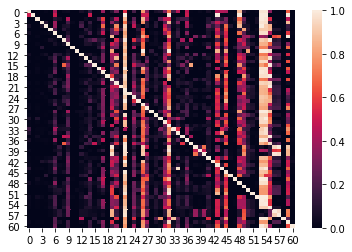

upperBodyLogo ---> lowerBodyCasual 0.9837837837837838
upperBodyLogo ---> upperBodyCasual 0.9837837837837838
lowerBodyThinStripes ---> upperBodyLongSleeve 1.0
lowerBodyThinStripes ---> hairShort 1.0
lowerBodyThinStripes ---> lowerBodyTrousers 1.0
lowerBodyThinStripes ---> personalLess30 1.0
lowerBodyThinStripes ---> lowerBodyCasual 1.0
lowerBodyThinStripes ---> upperBodyCasual 1.0
lowerBodyThinStripes ---> personalMale 1.0
upperBodyThinStripes ---> lowerBodyCasual 1.0
upperBodyThinStripes ---> upperBodyCasual 0.9823529411764705
upperBodyThickStripes ---> lowerBodyCasual 0.9789473684210527
upperBodyThickStripes ---> upperBodyCasual 0.968421052631579
accessoryHeadphone ---> lowerBodyCasual 1.0
carryingBackpack ---> lowerBodyCasual 0.9667330110889963
carryingBackpack ---> upperBodyCasual 0.9673016775661075
hairBald ---> personalMale 1.0
footwearBoots ---> upperBodyLongSleeve 0.977924944812362
footwearBoots ---> personalFemale 0.9933774834437086
carryingUmbrella ---> accessoryNothing 1.0
ca

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(reason)
plt.show()
for i in range(61):
    for j in range(61):
        if reason[i][j] >= 0.95 and i!= j:
            print(attributes_list_hiar[i], "--->", attributes_list_hiar[j], reason[i][j])

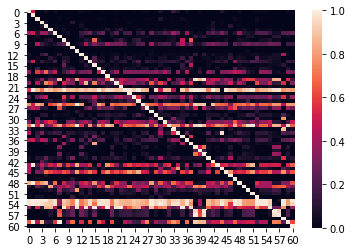

footwearLeatherShoes ---> upperBodySuit 0.9779338014042126
footwearLeatherShoes ---> lowerBodySuits 0.9618856569709128
upperBodyLongSleeve ---> lowerBodyThinStripes 1.0
upperBodyLongSleeve ---> footwearBoots 0.977924944812362
upperBodyLongSleeve ---> upperBodyJacket 0.9879608728367193
upperBodyLongSleeve ---> accessoryKerchief 0.9516129032258065
upperBodyLongSleeve ---> carryingLuggageCase 0.9812206572769953
upperBodyLongSleeve ---> accessoryMuffler 1.0
upperBodyLongSleeve ---> carryingPlasticBags 0.9509078681909886
upperBodyLongSleeve ---> footwearStocking 0.9742710120068611
upperBodyLongSleeve ---> upperBodySuit 0.9899699097291875
upperBodyLongSleeve ---> carryingSuitcase 0.9786096256684492
upperBodyLongSleeve ---> lowerBodySuits 0.9628886659979939
upperBodyLongSleeve ---> upperBodySweater 1.0
upperBodyLongSleeve ---> upperBodyOther 0.9894629817912931
upperBodyLongSleeve ---> personalLarger60 0.979420731707317
upperBodyLongSleeve ---> lowerBodyFormal 0.9610082709728239
upperBodyLongS

In [18]:
sns.heatmap(guide)
plt.show()
for i in range(61):
    for j in range(61):
        if guide[i][j] >= 0.95 and i!= j:
            print(attributes_list_hiar[i], "--->", attributes_list_hiar[j], guide[i][j])